# Random Forest

#### Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.



In [13]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

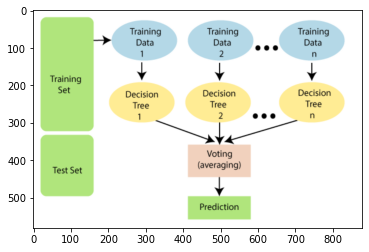

In [31]:
plt.imshow(plt.imread(r'download (3).png'))

In [14]:
# Reading the dataset (csv file)
df = pd.read_csv("Datasets/loan_prediction.csv")

In [15]:
# Visualizing 1st 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
# Finding shape
df.shape

(614, 13)

In [17]:
# Descriptive stats
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [18]:
# Finding for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# Removing unwanted columns
df.drop(columns=['Loan_ID','Gender','Dependents','Self_Employed'],inplace=True)

In [20]:
# Handling null values
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Married'].fillna("Yes",inplace=True)

In [21]:
df.isnull().sum()

Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    object 
 1   Education          614 non-null    object 
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    float64
 5   Loan_Amount_Term   614 non-null    float64
 6   Credit_History     614 non-null    float64
 7   Property_Area      614 non-null    object 
 8   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 43.3+ KB


In [23]:
# Encoding
le = LabelEncoder()

df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])

In [24]:
# Spliting dependent and independent variable
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [25]:
# Spliting data for train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [26]:
# Initializing knn
rf = RandomForestClassifier()

In [27]:
# Training model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
# Testing model
pred = rf.predict(x_test)

In [29]:
# Evaluating model performance
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           N       0.69      0.58      0.63        38
           Y       0.82      0.88      0.85        85

    accuracy                           0.79       123
   macro avg       0.76      0.73      0.74       123
weighted avg       0.78      0.79      0.78       123



In [30]:
# Evaluating model performance
metrics.confusion_matrix(y_test,pred)

array([[22, 16],
       [10, 75]], dtype=int64)